# Breast cancer

Le but de cet exercice est de construire un modèle de regression logistique pour **prédire la présence d'un cancer du sein**.

- Chargez le dataset *Breast Cancer.csv* sous forme d'un Pandas DataFrame.
- Débarassez-vous des colonnes inutiles:
  - id
  - Unnamed: 32
- Le champs "diagnosis" indique la présence d'un cancer (M) ou son absence (B). Transformez cette valeur en valeur numérique (0 et 1).
- Quelle est la répartition entre les échantillons positifs vs. négatifs?
- Préparez les données pour l'entrainement/test.
- Standardisez les variables explicatives.
- Evaluez le modèle et commentez les résultats.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [5]:
import os

df = pd.read_csv(os.path.join("data", "Breast Cancer.csv"))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df = df.drop(['id', 'Unnamed: 32'], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
def diagnosis(x):
    if x == 'M':
        return 1
    else:
        return 0
    
df['label'] = df['diagnosis'].apply(diagnosis)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [13]:
x = df.drop(['diagnosis','label'], axis = 1).to_numpy()
y = df['label'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [14]:
# Standardise Data

scaler = StandardScaler()

#fit scaler 
scaler.fit(x_train)

x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train_scale, y_train)

LogisticRegression()

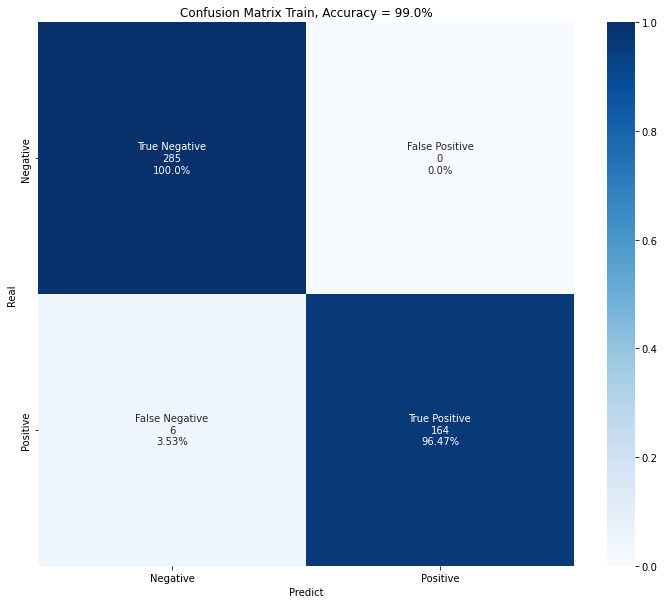

In [17]:
#Evaluation de model
from sklearn.metrics import confusion_matrix

y_predict_train = model.predict(x_train_scale)
cm_train = confusion_matrix(y_train, y_predict_train)
cm_train_perc = confusion_matrix(y_train, y_predict_train, normalize = 'true')

acc_score_train = accuracy_score(y_train, y_predict_train)

name = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [cm_train[0][0], cm_train[0][1], cm_train[1][0], cm_train[1][1]]
percentage = [cm_train_perc[0][0]*100, cm_train_perc[0][1]*100, cm_train_perc[1][0]*100, cm_train_perc[1][1]*100]


boxlabels = [f"{n}\n{c}\n{p.round(2)}%" for n,c,p in zip(name, counts, percentage)]
boxlabels = np.asarray(boxlabels).reshape(cm_train.shape[0],cm_train.shape[1])

plt.figure(figsize = (12,10))
plt.title('Confusion Matrix Train, Accuracy = '+ str(acc_score_train.round(2)*100)+ '%')

sns.heatmap(cm_train_perc, 
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'],
            fmt = '',
            annot = boxlabels)
    
plt.xlabel('Predict')
plt.ylabel('Real')

plt.show()

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#precision - how many were actually positive?
precision_train = precision_score(y_train, y_predict_train,)

#recall - True Positive Rate
recall_train = recall_score(y_train, y_predict_train,)

print("Training Precision = ", precision_train)
print("Training Recall = ", recall_train)

Training Precision =  1.0
Training Recall =  0.9647058823529412


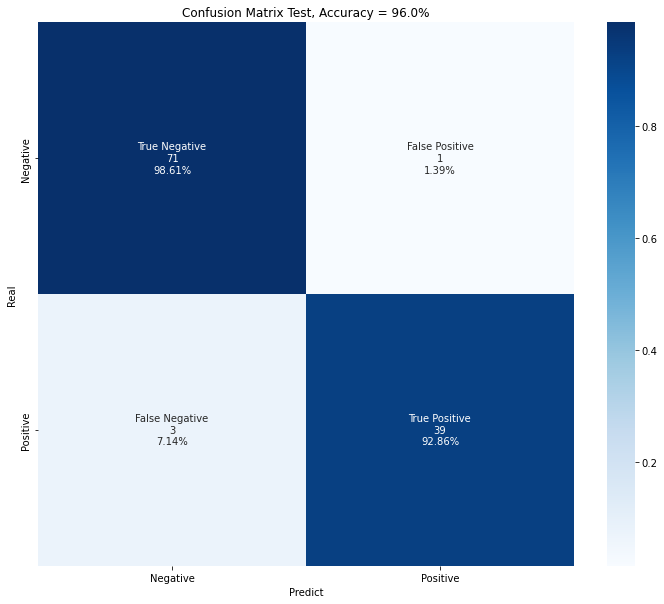

In [19]:
y_predict_test = model.predict(x_test_scale)
cm_test = confusion_matrix(y_test, y_predict_test)
cm_test_perc = confusion_matrix(y_test, y_predict_test, normalize = 'true')
acc_score_test = accuracy_score(y_test, y_predict_test)

name = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [cm_test[0][0], cm_test[0][1], cm_test[1][0], cm_test[1][1]]
percentage = [cm_test_perc[0][0]*100, cm_test_perc[0][1]*100, cm_test_perc[1][0]*100, cm_test_perc[1][1]*100]


boxlabels = [f"{n}\n{c}\n{p.round(2)}%" for n,c,p in zip(name, counts, percentage)]
boxlabels = np.asarray(boxlabels).reshape(2,2)

plt.figure(figsize = (12,10))
plt.title('Confusion Matrix Test, Accuracy = '+ str(acc_score_test.round(2)*100)+ '%')

sns.heatmap(cm_test_perc, 
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'],
            fmt = '',
            annot = boxlabels)
    
plt.xlabel('Predict')
plt.ylabel('Real')

plt.show()

In [20]:
#precision - how many were actually positive?
precision_test = precision_score(y_test, y_predict_test,)

#recall - True Positive Rate
recall_test = recall_score(y_test, y_predict_test,)

print("Test Precision = ", precision_test)
print("Test Recall = ", recall_test)

Test Precision =  0.975
Test Recall =  0.9285714285714286
